In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
abc = pd.read_csv('/home/yadhu/dataset/ABCCompany.csv')

In [5]:
abc.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [72]:
abc.fillna('unknown',inplace=True)

/tmp/ipykernel_5091/1471975642.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  abc.fillna('unknown',inplace=True)


In [11]:
count = abc.duplicated().sum()
print("Number of duplicate rows:", count)

Number of duplicate rows: 0


In [81]:
abc.Height = np.random.randint(150, 181, size=len(abc))
abc.Height.inplace=True

In [12]:
abc

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [22]:
#Task 1
no_employees = len(abc)
abc_team_data = abc.Team.value_counts()
percentage_spliting = (abc_team_data / no_employees) * 100
print(f'ABC Company have {len(abc_team_data)} teams for {no_employees} employees and the employees splitted aproximate {round(percentage_spliting.mean(),3)}% of total employees in the company. Below I given a detailed picture of this company using pie chart')
print(f'\nTeam with most number of players: {abc_team_data.idxmax()}')
print(f'Team with most number of players: {abc_team_data.idxmin()}')
print(f'\nTeam name and number of players in a team given below.\n{abc_team_data}')
print(f'\nThe percentage split relative to the total number of employees.\n{percentage_spliting}')

ABC Company have 30 teams for 458 employees and the employees splitted aproximate 3.333% of total employees in the company. Below I given a detailed picture of this company using pie chart

Team with most number of players: New Orleans Pelicans
Team with most number of players: Orlando Magic

Team name and number of players in a team given below.
Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
Milwaukee Bucks           16
New York Knicks           16
Boston Celtics            15
Los Angeles Clippers      15
Los Angeles Lakers        15
Phoenix Suns              15
Sacramento Kings          15
Brooklyn Nets             15
Philadelphia 76ers        15
Toronto Raptors           15
Golden State Warriors     15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Houston Rockets           15
San Antonio Spurs         15
Atlanta Hawks             15
Dallas Mavericks          15
Charlott

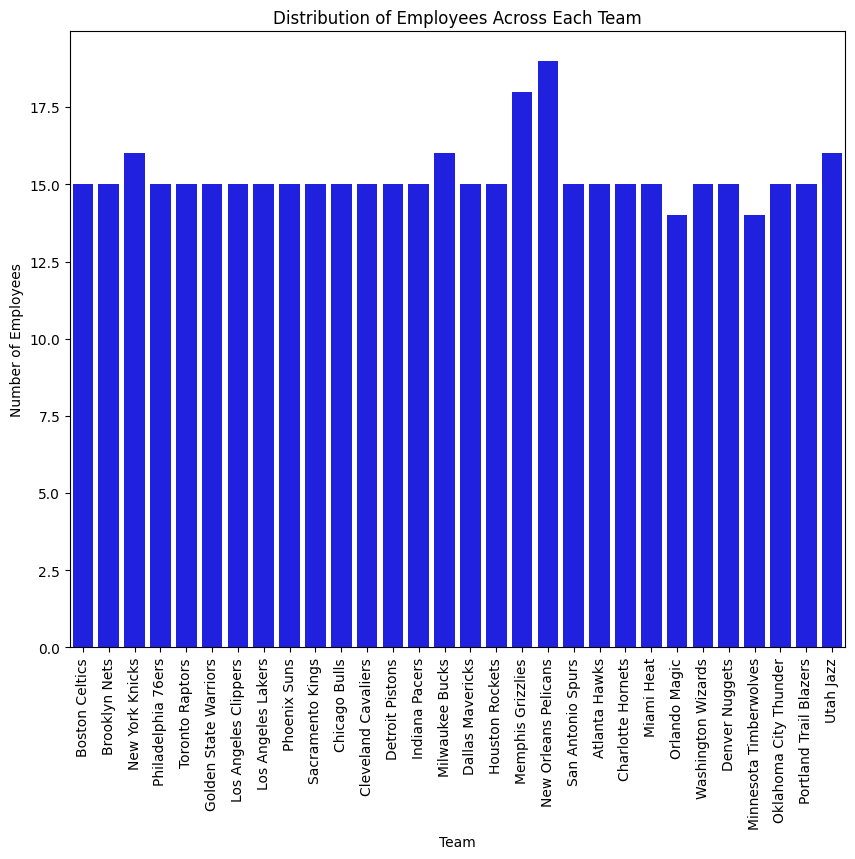

In [56]:
#Graph 1
plt.figure(figsize=(10, 8))
sns.countplot(x='Team', data=abc, color='blue')
plt.title('Distribution of Employees Across Each Team')
plt.xlabel('Team')
plt.xticks(rotation=90)
plt.ylabel('Number of Employees')
plt.show()

In [64]:
#task 2
employee_count = abc['Position'].value_counts()
print(f'Here, there are {len(employee_count)} employee positions and Employees in each postion are given below. \n {employee_count}')
print(f'\nMost number of Empoloyees in {employee_count.idxmax()} position and Least number of employees in {employee_count.idxmin()} position.') 

Here, there are 5 employee positions and Employees in each postion are given below. 
 Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64

Most number of Empoloyees in SG position and Least number of employees in C position.


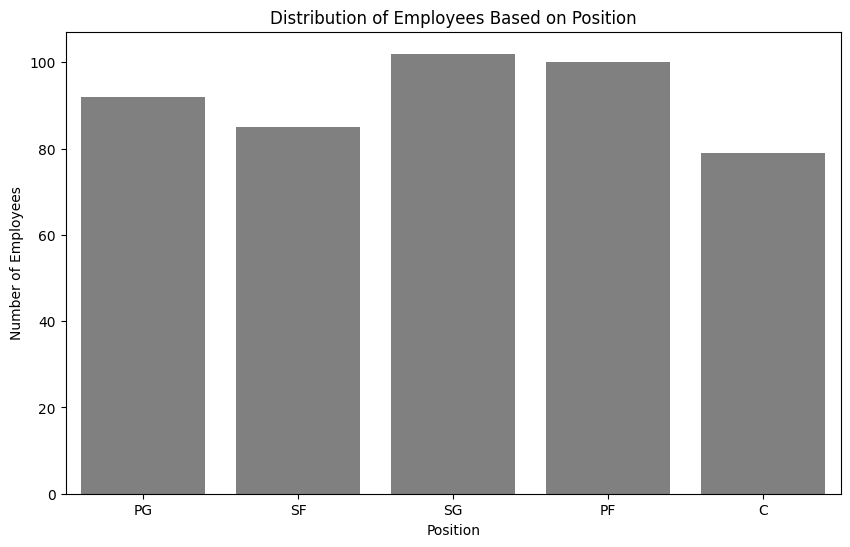

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Position', data=abc, color='grey')
plt.title('Distribution of Employees Based on Position')
plt.xlabel('Position')
plt.ylabel('Number of Employees')
plt.show()

In [93]:
#task 3
print("Age Grouping")
max_index = abc.Age.idxmax()
max_age = abc.Age.iloc[max_index]
min_index = abc.Age.idxmin()
min_age = abc.Age.iloc[min_index]
print(f'\n{max_age} is max age of employee and {min_age} is minimum age\n')
Age_bins = [20, 25, 30, 35, 40, 45, 50]
Age_label = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49']
abc['Age_Group'] = pd.cut(abc.Age , bins=Age_bins, labels=Age_label, right=False)
age_group = abc['Age_Group'].value_counts().sort_index()
print(age_group)

Age Grouping

40 is max age of employee and 19 is minimum age

Age_Group
20-24    152
25-29    182
30-34     90
35-39     29
40-44      3
45-49      0
Name: count, dtype: int64


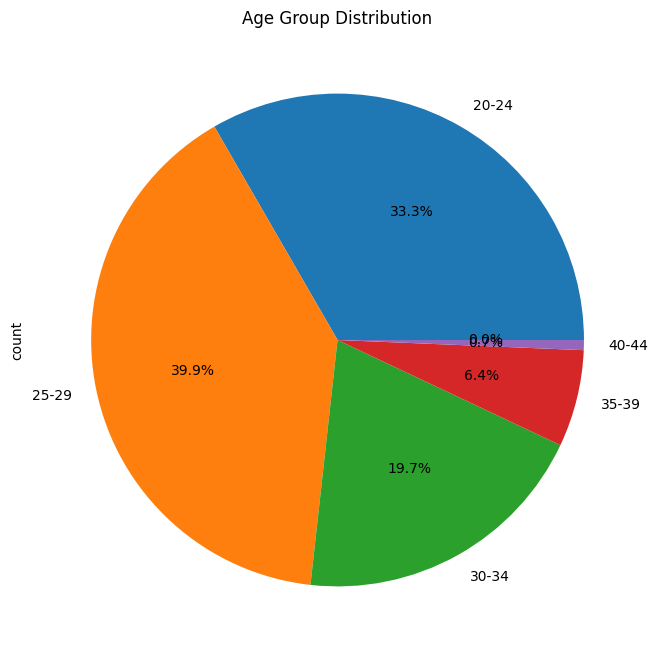

In [125]:
plt.figure(figsize=(8, 8))
age_group.plot(kind='pie', autopct='%1.1f%%')
plt.title('Age Group Distribution')
plt.show()

In [113]:
#task 4
team_salary = abc.groupby('Team')['Salary'].sum()
position_salary = abc.groupby('Position')['Salary'].sum()
print(f'This is sum of salary of each team. \n{team_salary}\n')
print(f'{team_salary.idxmax()} is the highest paying team and team {team_salary.idxmin()} is generaring lowest salary at the same time.')
print(f'This is position wise sum of salary of the employees. \n{position_salary}\n')
print(f'{position_salary.idxmax()} is the maximum paying position and position {position_salary.idxmin()} is generaring minimum salary at the same time.')

This is sum of salary of each team. 
Team
Atlanta Hawks              72902950.0
Boston Celtics             58541068.0
Brooklyn Nets              52528475.0
Charlotte Hornets          78340920.0
Chicago Bulls              86783378.0
Cleveland Cavaliers       106988689.0
Dallas Mavericks           71198732.0
Denver Nuggets             60121930.0
Detroit Pistons            67168263.0
Golden State Warriors      88868997.0
Houston Rockets            75283021.0
Indiana Pacers             66751826.0
Los Angeles Clippers       94854640.0
Los Angeles Lakers         71770431.0
Memphis Grizzlies          76550880.0
Miami Heat                 82515673.0
Milwaukee Bucks            69603517.0
Minnesota Timberwolves     59709697.0
New Orleans Pelicans       82750774.0
New York Knicks            73303898.0
Oklahoma City Thunder      93765298.0
Orlando Magic              60161470.0
Philadelphia 76ers         30992894.0
Phoenix Suns               63445135.0
Portland Trail Blazers     48301818.0
Sacramen

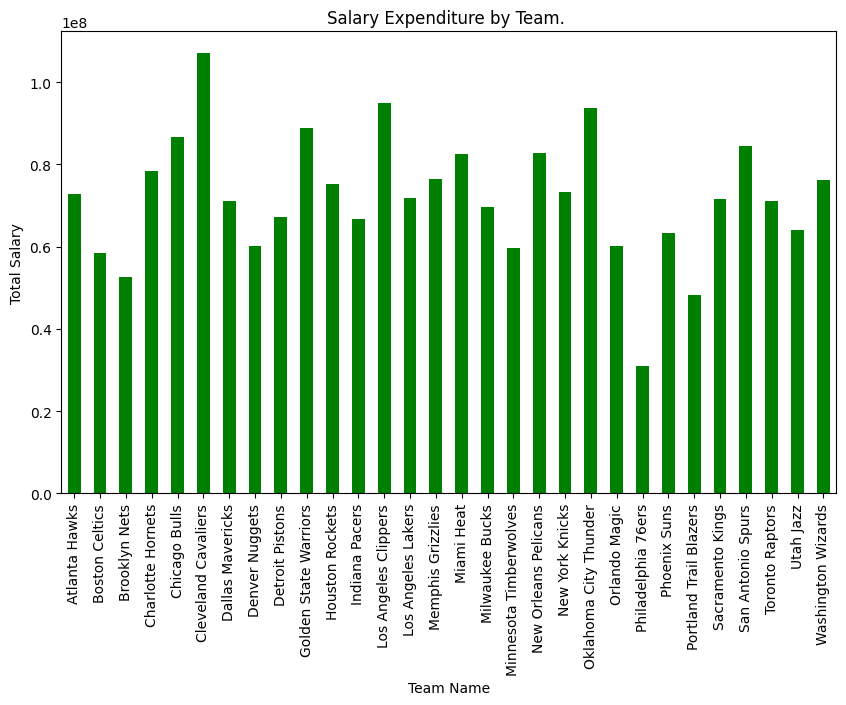

In [118]:
plt.figure(figsize=(10, 6))
team_salary.plot(kind='bar', color='green')
plt.title('Salary Expenditure by Team.')
plt.xlabel('Team Name')
plt.ylabel('Total Salary')
plt.show()

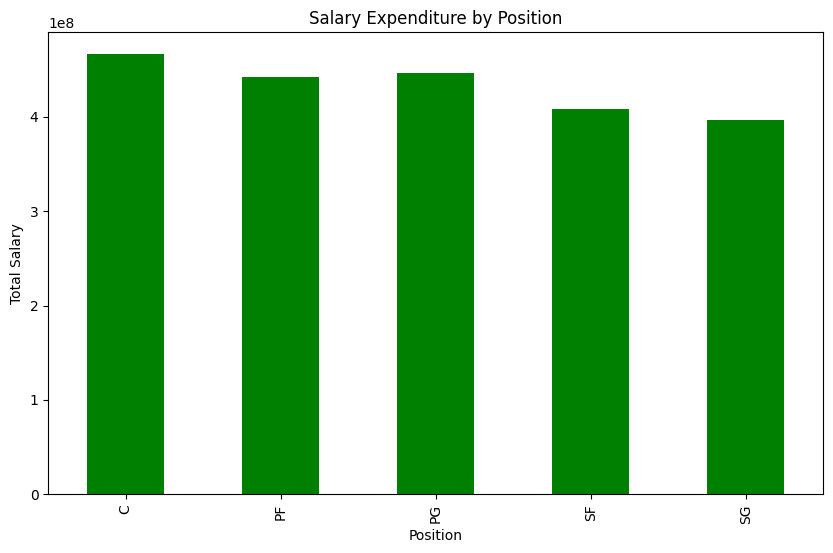

In [121]:
plt.figure(figsize=(10, 6))
position_salary.plot(kind='bar',color='green')
plt.title('Salary Expenditure by Position')
plt.xlabel('Position')
plt.ylabel('Total Salary')
plt.show()

In [130]:
#task 5
correlation = abc['Age'].corr(abc['Salary'])
print(f'\n Correlation between Age & Salary: {round(correlation,3)}')


 Correlation between Age & Salary: 0.214


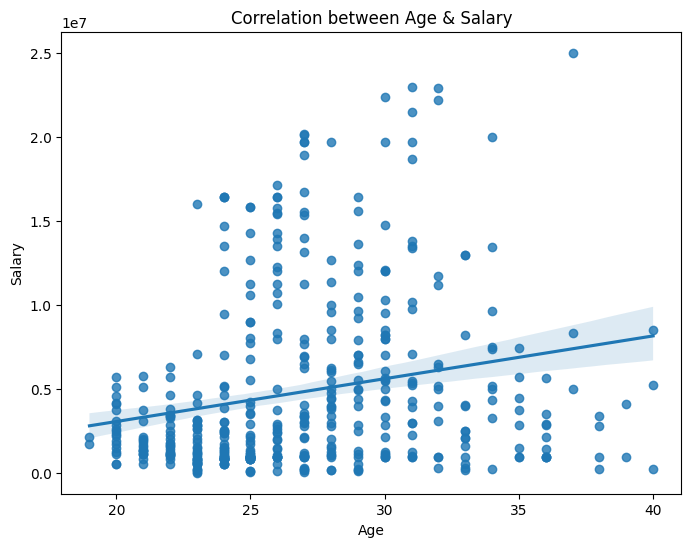

In [135]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='Salary', data=abc)
plt.title('Correlation between Age & Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()